In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
data = pd.read_csv('input_train.csv')
label = pd.read_csv('challenge_output_data_training_file_prediction_of_transaction_claims_status.csv', ';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
ID                      100000 non-null int64
SHIPPING_MODE           99685 non-null object
SHIPPING_PRICE          32390 non-null object
WARRANTIES_FLG          100000 non-null bool
WARRANTIES_PRICE        3397 non-null object
CARD_PAYMENT            100000 non-null int64
COUPON_PAYMENT          100000 non-null int64
RSP_PAYMENT             100000 non-null int64
WALLET_PAYMENT          100000 non-null int64
PRICECLUB_STATUS        99943 non-null object
REGISTRATION_DATE       100000 non-null int64
PURCHASE_COUNT          100000 non-null object
BUYER_BIRTHDAY_DATE     94164 non-null float64
BUYER_DEPARTMENT        100000 non-null int64
BUYING_DATE             100000 non-null object
SELLER_SCORE_COUNT      99994 non-null object
SELLER_SCORE_AVERAGE    99994 non-null float64
SELLER_COUNTRY          100000 non-null object
SELLER_DEPARTMENT       100000 non-null int64
PRODUCT_TYPE 

In [4]:
label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
ID            100000 non-null int64
CLAIM_TYPE    100000 non-null object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


# The Dataset

In [5]:
data.head(5)

,ID,SHIPPING_MODE,SHIPPING_PRICE,WARRANTIES_FLG,WARRANTIES_PRICE,CARD_PAYMENT,COUPON_PAYMENT,RSP_PAYMENT,WALLET_PAYMENT,PRICECLUB_STATUS,...,BUYER_BIRTHDAY_DATE,BUYER_DEPARTMENT,BUYING_DATE,SELLER_SCORE_COUNT,SELLER_SCORE_AVERAGE,SELLER_COUNTRY,SELLER_DEPARTMENT,PRODUCT_TYPE,PRODUCT_FAMILY,ITEM_PRICE
0,0,NORMAL,NaN,False,NaN,1,0,1,0,UNSUBSCRIBED,...,1992.0,34,3/2017,10000<100000,46.0,"FRANCE, METROPOLITAN",61,CELLPHONE_ACCESSORY,ELECTRONICS,<10
1,1,NORMAL,NaN,False,NaN,1,0,0,0,UNSUBSCRIBED,...,1952.0,77,8/2017,10000<100000,45.0,"FRANCE, METROPOLITAN",30,CELLPHONE_ACCESSORY,ELECTRONICS,<10
2,2,NORMAL,NaN,False,NaN,0,0,0,1,PLATINUM,...,1991.0,58,5/2017,10000<100000,43.0,CHINA,-1,TOYS,BABY,<10
3,3,RECOMMANDE,NaN,True,5<20,1,0,0,0,UNSUBSCRIBED,...,1955.0,31,5/2017,10000<100000,44.0,"FRANCE, METROPOLITAN",2,GARDEN_TOOLS,WHITE,50<100
4,4,RECOMMANDE,NaN,False,NaN,1,0,1,0,PLATINUM,...,1984.0,93,9/2017,1000<10000,44.0,CHINA,-1,MODEL,BABY,1000<5000


In [6]:
label.head(5)

,ID,CLAIM_TYPE
0,0,DAMAGED
1,1,-
2,2,NOT_RECEIVED
3,3,-
4,4,WITHDRAWAL


In [7]:
all_data = data.merge(label, left_on='ID', right_on='ID', how='inner').copy()

In [8]:
all_data.head(5)

,ID,SHIPPING_MODE,SHIPPING_PRICE,WARRANTIES_FLG,WARRANTIES_PRICE,CARD_PAYMENT,COUPON_PAYMENT,RSP_PAYMENT,WALLET_PAYMENT,PRICECLUB_STATUS,...,BUYER_DEPARTMENT,BUYING_DATE,SELLER_SCORE_COUNT,SELLER_SCORE_AVERAGE,SELLER_COUNTRY,SELLER_DEPARTMENT,PRODUCT_TYPE,PRODUCT_FAMILY,ITEM_PRICE,CLAIM_TYPE
0,0,NORMAL,NaN,False,NaN,1,0,1,0,UNSUBSCRIBED,...,34,3/2017,10000<100000,46.0,"FRANCE, METROPOLITAN",61,CELLPHONE_ACCESSORY,ELECTRONICS,<10,DAMAGED
1,1,NORMAL,NaN,False,NaN,1,0,0,0,UNSUBSCRIBED,...,77,8/2017,10000<100000,45.0,"FRANCE, METROPOLITAN",30,CELLPHONE_ACCESSORY,ELECTRONICS,<10,-
2,2,NORMAL,NaN,False,NaN,0,0,0,1,PLATINUM,...,58,5/2017,10000<100000,43.0,CHINA,-1,TOYS,BABY,<10,NOT_RECEIVED
3,3,RECOMMANDE,NaN,True,5<20,1,0,0,0,UNSUBSCRIBED,...,31,5/2017,10000<100000,44.0,"FRANCE, METROPOLITAN",2,GARDEN_TOOLS,WHITE,50<100,-
4,4,RECOMMANDE,NaN,False,NaN,1,0,1,0,PLATINUM,...,93,9/2017,1000<10000,44.0,CHINA,-1,MODEL,BABY,1000<5000,WITHDRAWAL


In [9]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 23 columns):
ID                      100000 non-null int64
SHIPPING_MODE           99685 non-null object
SHIPPING_PRICE          32390 non-null object
WARRANTIES_FLG          100000 non-null bool
WARRANTIES_PRICE        3397 non-null object
CARD_PAYMENT            100000 non-null int64
COUPON_PAYMENT          100000 non-null int64
RSP_PAYMENT             100000 non-null int64
WALLET_PAYMENT          100000 non-null int64
PRICECLUB_STATUS        99943 non-null object
REGISTRATION_DATE       100000 non-null int64
PURCHASE_COUNT          100000 non-null object
BUYER_BIRTHDAY_DATE     94164 non-null float64
BUYER_DEPARTMENT        100000 non-null int64
BUYING_DATE             100000 non-null object
SELLER_SCORE_COUNT      99994 non-null object
SELLER_SCORE_AVERAGE    99994 non-null float64
SELLER_COUNTRY          100000 non-null object
SELLER_DEPARTMENT       100000 non-null int64
PRODUCT_TYPE 

In [10]:
all_data.describe(include=['number'])

,ID,CARD_PAYMENT,COUPON_PAYMENT,RSP_PAYMENT,WALLET_PAYMENT,REGISTRATION_DATE,BUYER_BIRTHDAY_DATE,BUYER_DEPARTMENT,SELLER_SCORE_AVERAGE,SELLER_DEPARTMENT
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,94164.000000,100000.000000,99994.000000,100000.000000
mean,49999.500000,0.895930,0.057290,0.170580,0.129550,2012.595230,1976.129912,54.280890,45.850731,32.670560
std,28867.657797,0.305353,0.232397,0.376143,0.335809,4.201691,14.127001,27.864038,2.506009,35.006913
min,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,1900.000000,-1.000000,10.000000,-1.000000
25%,24999.750000,1.000000,0.000000,0.000000,0.000000,2010.000000,1967.000000,32.000000,45.000000,-1.000000
50%,49999.500000,1.000000,0.000000,0.000000,0.000000,2014.000000,1977.000000,59.000000,46.000000,22.000000
75%,74999.250000,1.000000,0.000000,0.000000,0.000000,2016.000000,1987.000000,77.000000,47.000000,70.000000
max,99999.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,2016.000000,98.000000,50.000000,98.000000


In [11]:
all_data.describe(exclude=['number'])

,SHIPPING_MODE,SHIPPING_PRICE,WARRANTIES_FLG,WARRANTIES_PRICE,PRICECLUB_STATUS,PURCHASE_COUNT,BUYING_DATE,SELLER_SCORE_COUNT,SELLER_COUNTRY,PRODUCT_TYPE,PRODUCT_FAMILY,ITEM_PRICE,CLAIM_TYPE
count,99685,32390,100000,3397,99943,100000,100000,99994,100000,100000,100000,100000,100000
unique,11,5,2,5,5,6,10,5,39,137,12,8,8
top,NORMAL,1<5,False,<5,UNSUBSCRIBED,<5,1/2017,10000<100000,"FRANCE, METROPOLITAN",BOOKS,ELECTRONICS,<10,-
freq,66592,17003,96603,2305,61524,42802,12499,31104,57682,21987,26258,52196,49977


In [12]:
all_data.groupby('CLAIM_TYPE').count()

,ID,SHIPPING_MODE,SHIPPING_PRICE,WARRANTIES_FLG,WARRANTIES_PRICE,CARD_PAYMENT,COUPON_PAYMENT,RSP_PAYMENT,WALLET_PAYMENT,PRICECLUB_STATUS,...,BUYER_BIRTHDAY_DATE,BUYER_DEPARTMENT,BUYING_DATE,SELLER_SCORE_COUNT,SELLER_SCORE_AVERAGE,SELLER_COUNTRY,SELLER_DEPARTMENT,PRODUCT_TYPE,PRODUCT_FAMILY,ITEM_PRICE
CLAIM_TYPE,,,,,,,,,,,,,,,,,,,,,
-,49977,49819,16821,49977,1369,49977,49977,49977,49977,49954,...,46155,49977,49977,49977,49977,49977,49977,49977,49977,49977
DAMAGED,5922,5901,1163,5922,299,5922,5922,5922,5922,5916,...,5722,5922,5922,5922,5922,5922,5922,5922,5922,5922
DIFFERENT,4279,4277,1201,4279,180,4279,4279,4279,4279,4279,...,4131,4279,4279,4279,4279,4279,4279,4279,4279,4279
FAKE,165,165,23,165,9,165,165,165,165,165,...,159,165,165,165,165,165,165,165,165,165
NOT_RECEIVED,14808,14777,4043,14808,419,14808,14808,14808,14808,14799,...,14209,14808,14808,14803,14803,14808,14808,14808,14808,14808
SELLER_CANCEL_POSTERIORI,13782,13758,5775,13782,478,13782,13782,13782,13782,13775,...,13310,13782,13782,13782,13782,13782,13782,13782,13782,13782
UNDEFINED,4066,4012,1024,4066,215,4066,4066,4066,4066,4063,...,3921,4066,4066,4066,4066,4066,4066,4066,4066,4066
WITHDRAWAL,7001,6976,2340,7001,428,7001,7001,7001,7001,6992,...,6557,7001,7001,7000,7000,7001,7001,7001,7001,7001


In [13]:
all_data[['CLAIM_TYPE', 'ID']].groupby('CLAIM_TYPE').count().apply(lambda x: x*100/x.sum()).rename(columns={'ID':'%'})

,%
CLAIM_TYPE,
-,49.977
DAMAGED,5.922
DIFFERENT,4.279
FAKE,0.165
NOT_RECEIVED,14.808
SELLER_CANCEL_POSTERIORI,13.782
UNDEFINED,4.066
WITHDRAWAL,7.001


In [14]:
for name in list(all_data):
    print(name + ': ', all_data[name].unique()) 

ID:  [    0     1     2 ... 99997 99998 99999]
SHIPPING_MODE:  ['NORMAL' 'RECOMMANDE' 'EXPRESS_DELIVERY' 'SUIVI' 'SO_RECOMMANDE'
 'MONDIAL_RELAY' 'MONDIAL_RELAY_PREPAYE' 'SO_POINT_RELAIS' nan
 'CHRONOPOST' 'PICKUP' 'Kiala']
SHIPPING_PRICE:  [nan '5<10' '10<20' '<1' '1<5' '>20']
WARRANTIES_FLG:  [False  True]
WARRANTIES_PRICE:  [nan '5<20' '<5' '20<50' '50<100' '100<500']
CARD_PAYMENT:  [1 0]
COUPON_PAYMENT:  [0 1]
RSP_PAYMENT:  [1 0]
WALLET_PAYMENT:  [0 1]
PRICECLUB_STATUS:  ['UNSUBSCRIBED' 'PLATINUM' 'SILVER' 'REGULAR' 'GOLD' nan]
REGISTRATION_DATE:  [2015 2013 2007 2010 2005 2016 2004 2017 2012 2006 2009 2002 2014 2008
 2011 2003 2001]
PURCHASE_COUNT:  ['<5' '50<100' '>500' '5<20' '100<500' '20<50']
BUYER_BIRTHDAY_DATE:  [1992. 1952. 1991. 1955. 1984. 1987. 1986.   nan 1960. 1993. 1978. 1971.
 1990. 1983. 1973. 1985. 1988. 1994. 1998. 1970. 1956. 1961. 1974. 1989.
 1976. 1981. 1982. 1966. 1959. 2000. 1979. 1962. 1968. 1945. 1977. 1969.
 1980. 1954. 1957. 1997. 1995. 1996. 1958. 1972.

# FEATURES


```
#########################################################
################### Numerical discret ###################
#########################################################
REGISTRATION_DATE:  2015, 2013, 2007, 2010, 2005...
BUYER_BIRTHDAY_DATE:  1992., 1952., 1991., 1955., 1984. ...
BUYING_DATE:  '3/2017', '8/2017', '5/2017', '9/2017'...
SELLER_SCORE_AVERAGE:  46., 45., 43., 44., 49., 48. ...

#########################################################
#################### Categorical ########################
#########################################################

####### Dichotomous #######
CARD_PAYMENT:  [1 0]
COUPON_PAYMENT:  [0 1]
RSP_PAYMENT:  [1 0]
WALLET_PAYMENT:  [0 1]
WARRANTIES_FLG:  [False  True]

####### Nominal ####### 
SHIPPING_MODE:  'NORMAL', 'RECOMMANDE', 'EXPRESS_DELIVERY', 'SUIVI', 'SO_RECOMMANDE'...
SELLER_COUNTRY:  'FRANCE, METROPOLITAN', 'CHINA', 'HONG KONG', 'SPAIN', 'UNITED KINGDOM'...
PRODUCT_TYPE:  'CELLPHONE_ACCESSORY', 'TOYS', 'GARDEN_TOOLS', 'MODEL'...
PRODUCT_FAMILY:  'ELECTRONICS', 'BABY', 'WHITE', 'CLOTHING', 'VIDEO'...
BUYER_DEPARTMENT:  34, 77, 58,31, 93...
SELLER_DEPARTMENT:  61, 30, -1,  2, 72, 75, 65...

#######Ordinal #######
PRICECLUB_STATUS:  'UNSUBSCRIBED', 'PLATINUM', 'SILVER', 'REGULAR', 'GOLD', nan
SHIPPING_PRICE:  nan, '5<10', '10<20', '<1', '1<5', '>20'
WARRANTIES_PRICE:  nan, '5<20', '<5', '20<50', '50<100', '100<500'
PURCHASE_COUNT:  '<5' '50<100' '>500' '5<20' '100<500' '20<50'
SELLER_SCORE_COUNT:  '10000<100000', '1000<10000', '100000<1000000', '100<1000', '<100', nan
ITEM_PRICE:  '<10', '50<100', '1000<5000', '100<500', '10<20'...
```

# UNBALANCED DATASET

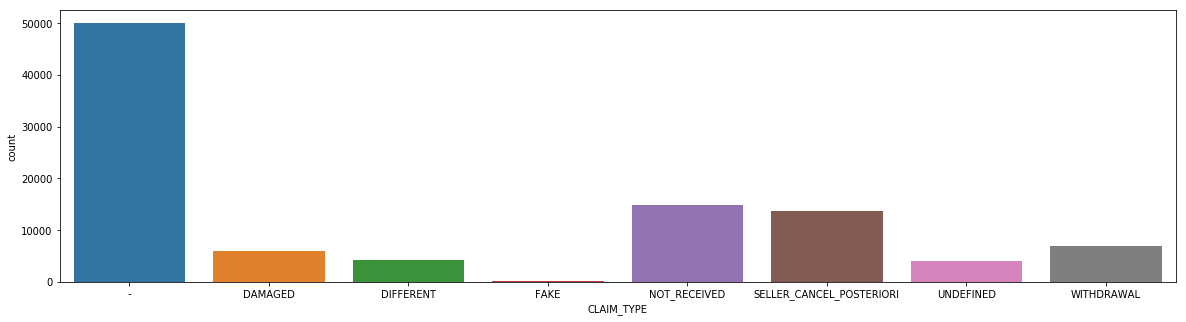

In [15]:
claim_order = sorted(all_data['CLAIM_TYPE'].unique())
plt.figure(figsize=(20,5))
sns.countplot(all_data['CLAIM_TYPE'], order=claim_order);

# MISSING DATA

In [16]:
missing_data_columns = all_data.columns[all_data.isna().any()].tolist()
print(missing_data_columns)

['SHIPPING_MODE', 'SHIPPING_PRICE', 'WARRANTIES_PRICE', 'PRICECLUB_STATUS', 'BUYER_BIRTHDAY_DATE', 'SELLER_SCORE_COUNT', 'SELLER_SCORE_AVERAGE']


In [17]:
all_data[missing_data_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 7 columns):
SHIPPING_MODE           99685 non-null object
SHIPPING_PRICE          32390 non-null object
WARRANTIES_PRICE        3397 non-null object
PRICECLUB_STATUS        99943 non-null object
BUYER_BIRTHDAY_DATE     94164 non-null float64
SELLER_SCORE_COUNT      99994 non-null object
SELLER_SCORE_AVERAGE    99994 non-null float64
dtypes: float64(2), object(5)
memory usage: 8.6+ MB


In [18]:
missing_data = all_data.get(np.append(missing_data_columns, 'CLAIM_TYPE')).copy()
missing_data = missing_data.fillna(-1)

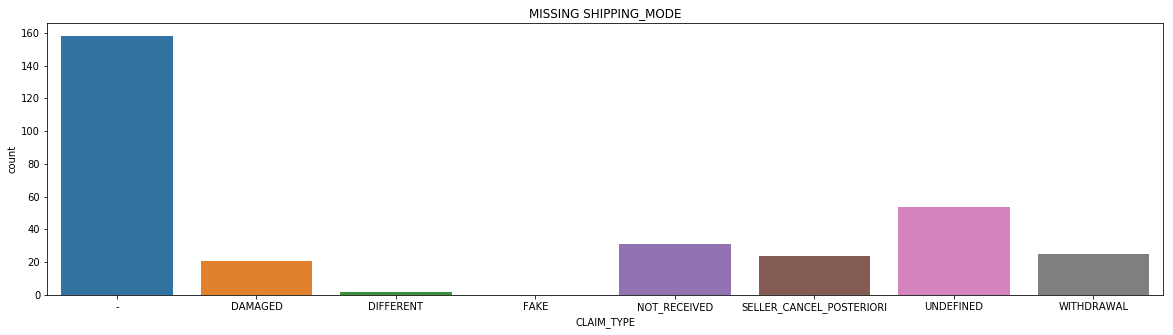

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(missing_data[missing_data['SHIPPING_MODE']==-1]['CLAIM_TYPE'], order=claim_order).set_title('MISSING SHIPPING_MODE');

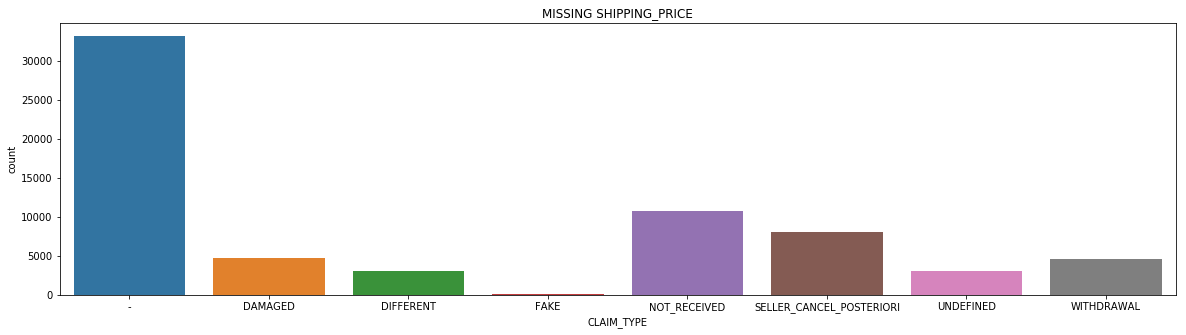

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(missing_data[missing_data['SHIPPING_PRICE']==-1]['CLAIM_TYPE'], order=claim_order).set_title('MISSING SHIPPING_PRICE');

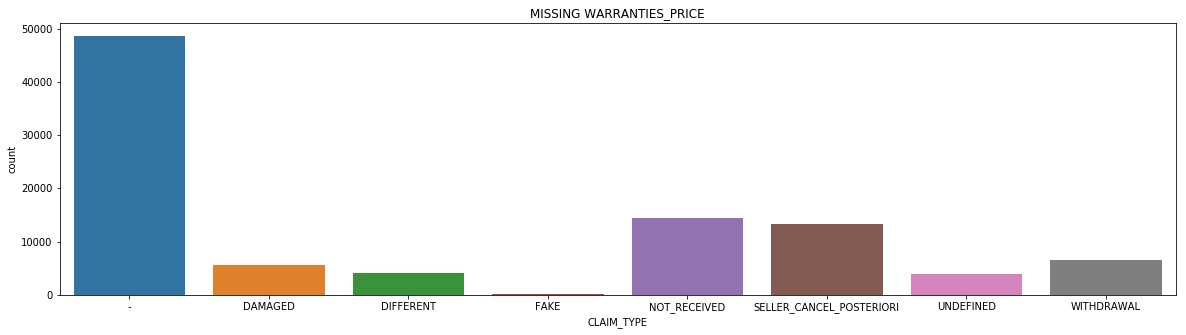

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(missing_data[missing_data['WARRANTIES_PRICE']==-1]['CLAIM_TYPE'], order=claim_order).set_title('MISSING WARRANTIES_PRICE');

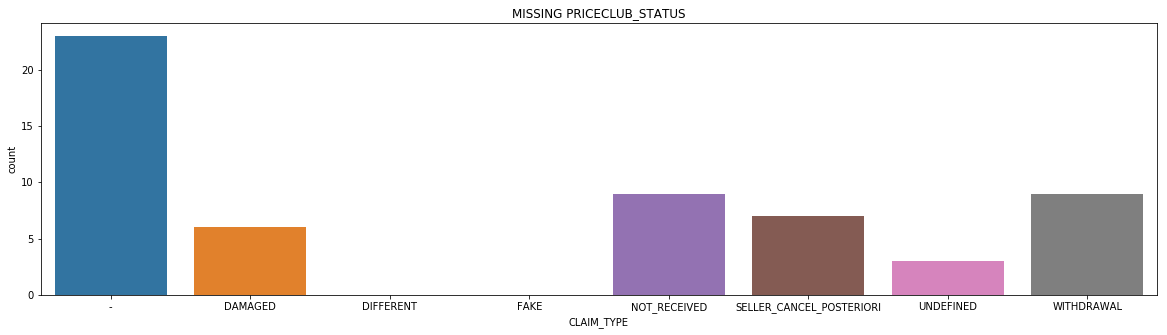

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(missing_data[missing_data['PRICECLUB_STATUS']==-1]['CLAIM_TYPE'], order=claim_order).set_title('MISSING PRICECLUB_STATUS');

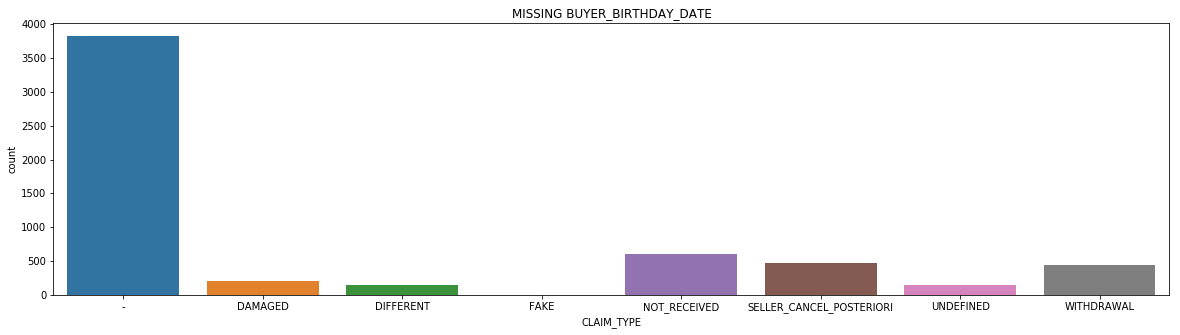

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(missing_data[missing_data['BUYER_BIRTHDAY_DATE']==-1]['CLAIM_TYPE'], order=claim_order).set_title('MISSING BUYER_BIRTHDAY_DATE');

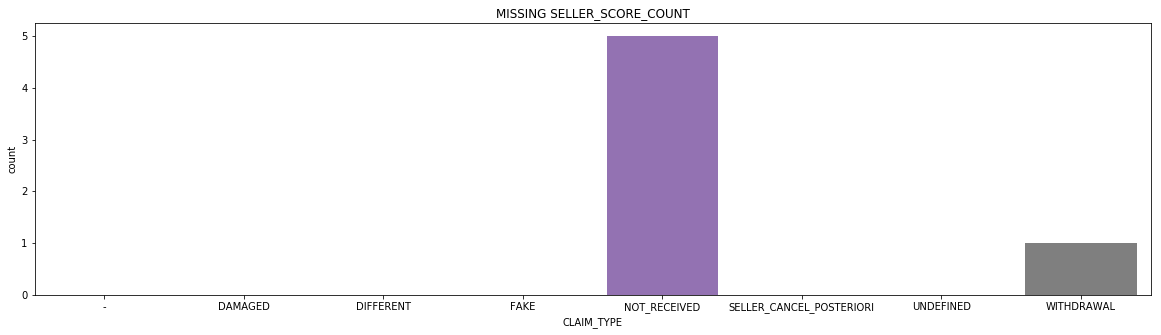

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(missing_data[missing_data['SELLER_SCORE_COUNT']==-1]['CLAIM_TYPE'], order=claim_order).set_title('MISSING SELLER_SCORE_COUNT');

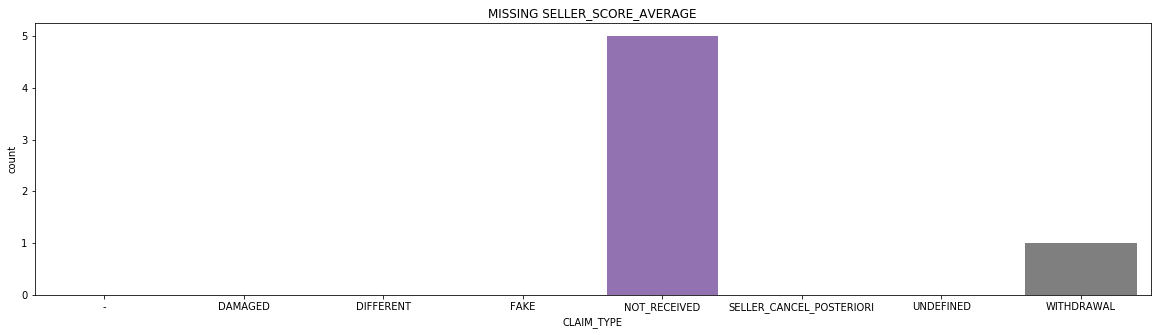

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(missing_data[missing_data['SELLER_SCORE_AVERAGE']==-1]['CLAIM_TYPE'], order=claim_order).set_title('MISSING SELLER_SCORE_AVERAGE');

In [26]:
missing_data = all_data.get(['SHIPPING_MODE', 'SHIPPING_PRICE'])
print('-----------------SHIPPING_MODE x SHIPPING_PRICE--------------')
print('If SHIPPING_MODE=Nan then  SHIPPING_PRICE is: ', missing_data[missing_data['SHIPPING_MODE'].isna()]['SHIPPING_PRICE'].unique())
print('If SHIPPING_PRICE=Nan then SHIPPING_MODE is: ', missing_data[missing_data['SHIPPING_PRICE'].isna()]['SHIPPING_MODE'].unique())

-----------------SHIPPING_MODE x SHIPPING_PRICE--------------
If SHIPPING_MODE=Nan then  SHIPPING_PRICE is:  [nan '10<20' '>20' '5<10' '<1' '1<5']
If SHIPPING_PRICE=Nan then SHIPPING_MODE is:  ['NORMAL' 'RECOMMANDE' 'SUIVI' 'MONDIAL_RELAY' 'MONDIAL_RELAY_PREPAYE'
 'SO_POINT_RELAIS' 'EXPRESS_DELIVERY' 'SO_RECOMMANDE' nan 'CHRONOPOST'
 'PICKUP' 'Kiala']


In [27]:
# WARRANTIES_PRICE Nan is not missing value but NON_WARRANTIES
# WARRANTIES_FLG is an indicator variable
missing_data = all_data.get(['WARRANTIES_FLG', 'WARRANTIES_PRICE'])
print('-----------------WARRANTIES_PRICE--------------')
print('If WARRANTIES_FLG=False then WARRANTIES_PRICE is: ', missing_data[missing_data['WARRANTIES_FLG']==False]['WARRANTIES_PRICE'].unique())
print('If WARRANTIES_FLG=True then WARRANTIES_PRICE is: ', missing_data[missing_data['WARRANTIES_FLG']==True]['WARRANTIES_PRICE'].unique())

-----------------WARRANTIES_PRICE--------------
If WARRANTIES_FLG=False then WARRANTIES_PRICE is:  [nan]
If WARRANTIES_FLG=True then WARRANTIES_PRICE is:  ['5<20' '<5' '20<50' '50<100' '100<500']


In [28]:
missing_data = all_data.get(['PRICECLUB_STATUS', 'RSP_PAYMENT'])
print('-----------------PRICECLUB_STATUS --------------')
print('If PRICECLUB_STATUS=Nan then  RSP_PAYMENT is: ', missing_data[missing_data['PRICECLUB_STATUS'].isna()]['RSP_PAYMENT'].unique())

-----------------PRICECLUB_STATUS --------------
If PRICECLUB_STATUS=Nan then  RSP_PAYMENT is:  [0]


In [29]:
missing_data = all_data.get(['BUYER_BIRTHDAY_DATE', 'WALLET_PAYMENT'])
print('-----------------BUYER_BIRTHDAY_DATE --------------')
print('If BUYER_BIRTHDAY_DATE=Nan then  WALLET_PAYMENT is: ', missing_data[missing_data['BUYER_BIRTHDAY_DATE'].isna()]['WALLET_PAYMENT'].unique())

-----------------BUYER_BIRTHDAY_DATE --------------
If BUYER_BIRTHDAY_DATE=Nan then  WALLET_PAYMENT is:  [0]


In [30]:
missing_data = all_data.get(['SELLER_SCORE_COUNT', 'SELLER_SCORE_AVERAGE'])
print('-----------------SELLER_SCORE_COUNT x SHIPPING_PRICE--------------')
print('If SELLER_SCORE_COUNT=Nan then  SELLER_SCORE_AVERAGE is: ', missing_data[missing_data['SELLER_SCORE_COUNT'].isna()]['SELLER_SCORE_AVERAGE'].unique())
print('If SELLER_SCORE_AVERAGE=Nan then SELLER_SCORE_COUNT is: ', missing_data[missing_data['SELLER_SCORE_AVERAGE'].isna()]['SELLER_SCORE_COUNT'].unique())

-----------------SELLER_SCORE_COUNT x SHIPPING_PRICE--------------
If SELLER_SCORE_COUNT=Nan then  SELLER_SCORE_AVERAGE is:  [nan]
If SELLER_SCORE_AVERAGE=Nan then SELLER_SCORE_COUNT is:  [nan]


# OUTLIERS 

Just for numerical features, some data modification is necessary for visualization

In [31]:
numerical_features = all_data.get(['REGISTRATION_DATE','BUYER_BIRTHDAY_DATE','BUYING_DATE','SELLER_SCORE_AVERAGE','CLAIM_TYPE']).copy()

# MISSING DATA "CORRECTION" FOR VISUALIZATION
# BUYER_BIRTHDAY_DATE = 1850 is for missing data 
#numerical_features['BUYER_BIRTHDAY_DATE'] = numerical_features['BUYER_BIRTHDAY_DATE'].fillna(1850).values
#numerical_features['SELLER_SCORE_AVERAGE'] = numerical_features['SELLER_SCORE_AVERAGE'].fillna(0).values

numerical_features = numerical_features.drop(numerical_features[(numerical_features['BUYER_BIRTHDAY_DATE'].isna()) ].index)
numerical_features = numerical_features.drop(numerical_features[(numerical_features['SELLER_SCORE_AVERAGE'].isna()) ].index)

# '3/2017' => 201703
temp = numerical_features['BUYING_DATE'].str.split('/')
numerical_features['BUYING_DATE'] = temp.str[1] + temp.str[0].str.zfill(2)
numerical_features['BUYING_DATE'] = numerical_features['BUYING_DATE'].astype('int32')

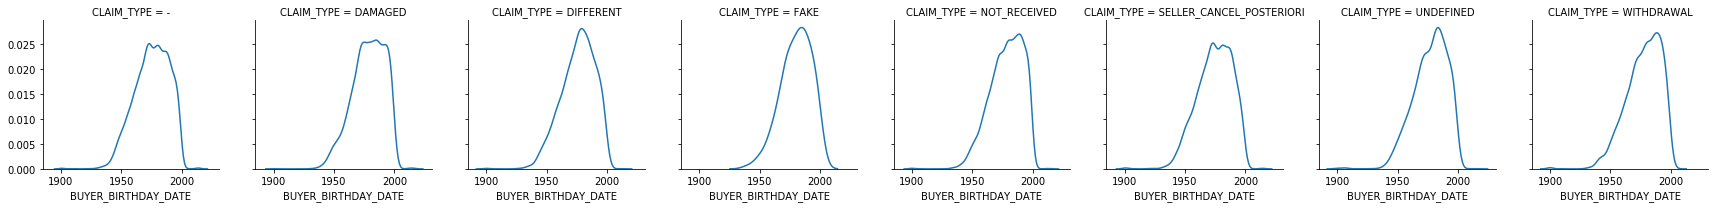

In [32]:
# BUYER_BIRTHDAY_DATE = 1850 is for missing data 
g = sns.FacetGrid(numerical_features, col="CLAIM_TYPE", col_order=claim_order);
g.map(sns.distplot, "BUYER_BIRTHDAY_DATE", hist=False);

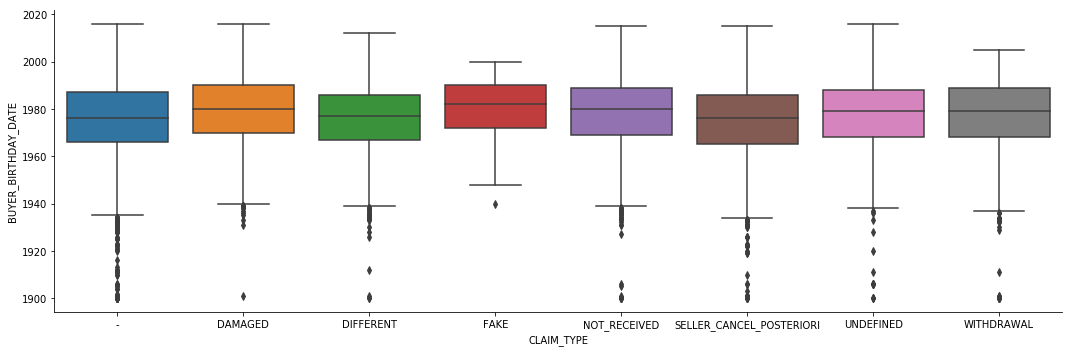

In [33]:
g = sns.catplot(data=numerical_features, y='BUYER_BIRTHDAY_DATE', x='CLAIM_TYPE', order=claim_order, kind="box", height=5, aspect=3);

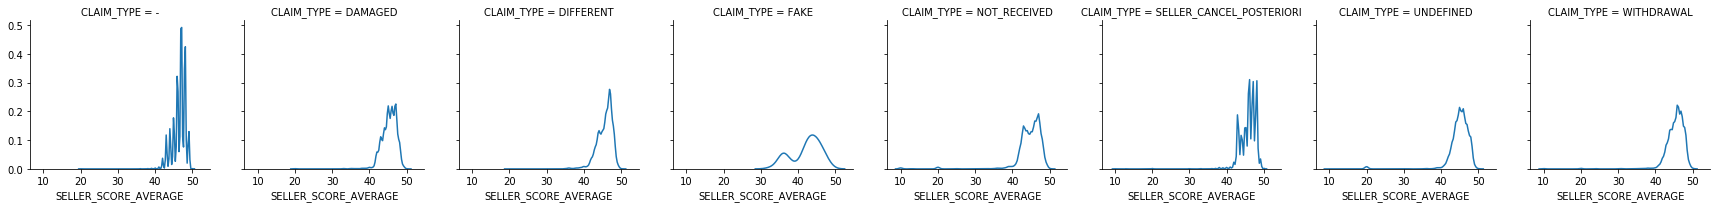

In [34]:
g = sns.FacetGrid(numerical_features, col="CLAIM_TYPE", col_order=claim_order);
g.map(sns.distplot, "SELLER_SCORE_AVERAGE", hist=False);

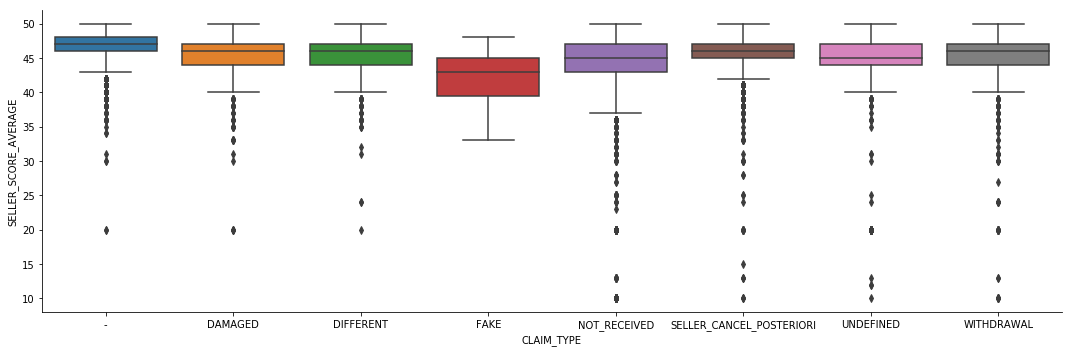

In [35]:
g = sns.catplot(data=numerical_features, y='SELLER_SCORE_AVERAGE', x='CLAIM_TYPE', order=claim_order, kind="box", height=5, aspect=3);

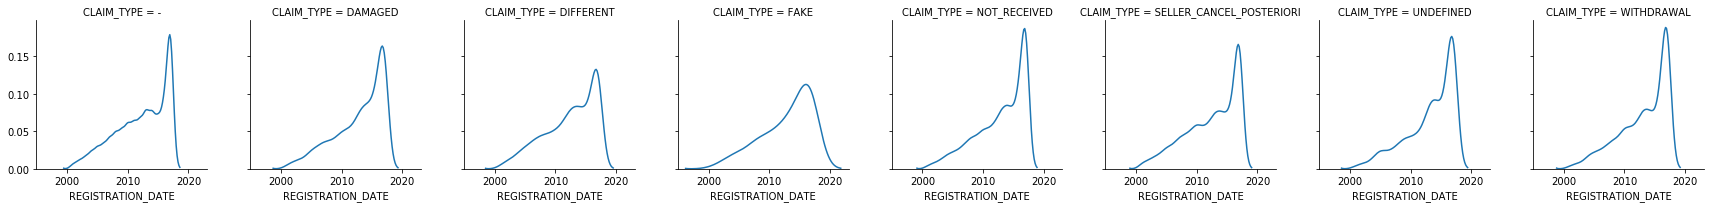

In [36]:
g = sns.FacetGrid(numerical_features, col="CLAIM_TYPE", col_order=claim_order);
g.map(sns.distplot, "REGISTRATION_DATE", hist=False);

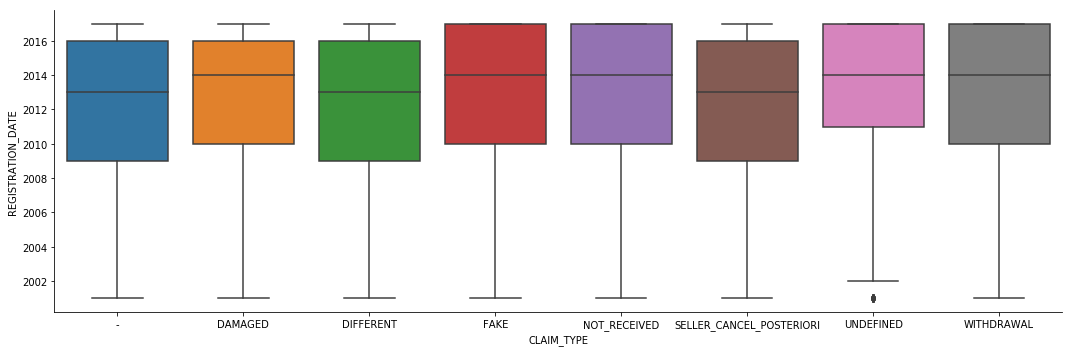

In [37]:
g = sns.catplot(data=numerical_features, y='REGISTRATION_DATE', x='CLAIM_TYPE', order=claim_order, kind="box", height=5, aspect=3);


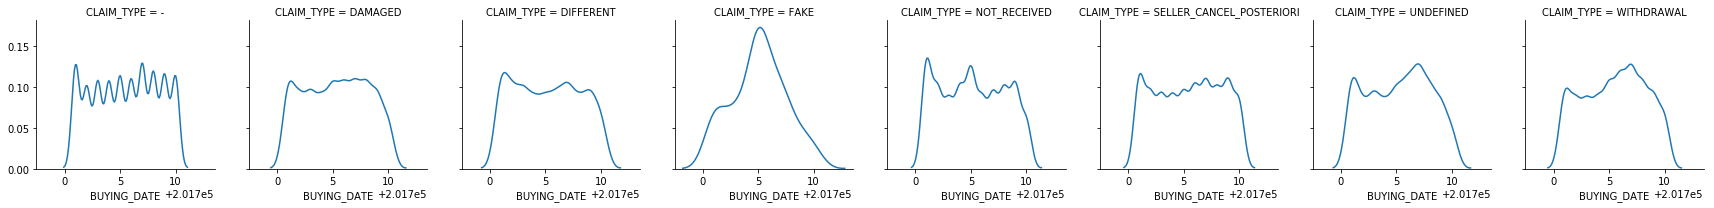

In [38]:
g = sns.FacetGrid(numerical_features, col="CLAIM_TYPE", col_order=claim_order);
g.map(sns.distplot, "BUYING_DATE", hist=False);

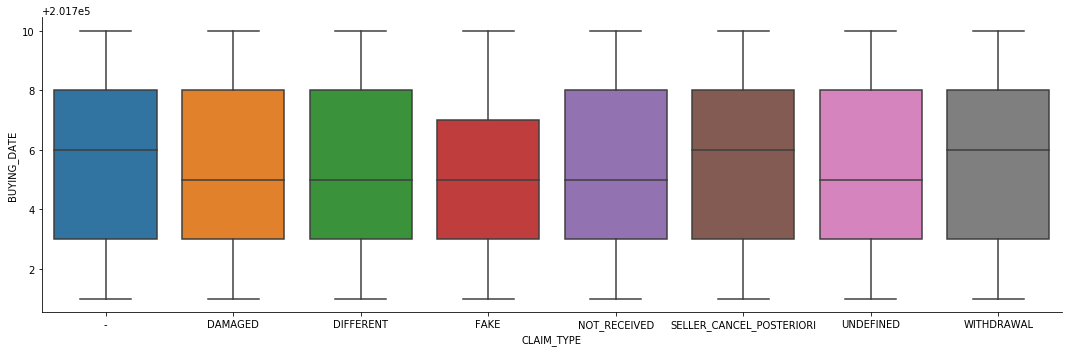

In [39]:
g = sns.catplot(data=numerical_features, y='BUYING_DATE', x='CLAIM_TYPE', order=claim_order, kind="box", height=5, aspect=3);

# NUMERICAL FEATURES

In [40]:
numerical_features.head(5)

,REGISTRATION_DATE,BUYER_BIRTHDAY_DATE,BUYING_DATE,SELLER_SCORE_AVERAGE,CLAIM_TYPE
0,2015,1992.0,201703,46.0,DAMAGED
1,2013,1952.0,201708,45.0,-
2,2013,1991.0,201705,43.0,NOT_RECEIVED
3,2007,1955.0,201705,44.0,-
4,2010,1984.0,201709,44.0,WITHDRAWAL


In [41]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94159 entries, 0 to 99999
Data columns (total 5 columns):
REGISTRATION_DATE       94159 non-null int64
BUYER_BIRTHDAY_DATE     94159 non-null float64
BUYING_DATE             94159 non-null int32
SELLER_SCORE_AVERAGE    94159 non-null float64
CLAIM_TYPE              94159 non-null object
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 6.5+ MB


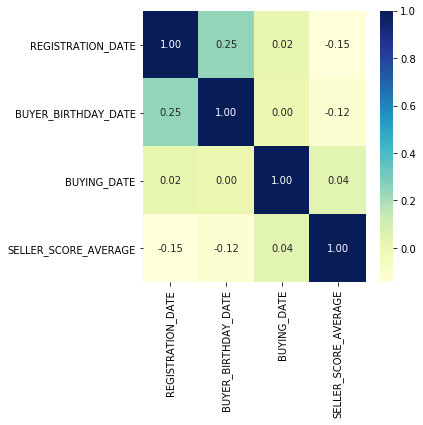

In [42]:
# Correlations
corr = numerical_features.corr()
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, cmap="YlGnBu", annot=True, fmt=".2f");

In [43]:
numerical_features.head(5)

,REGISTRATION_DATE,BUYER_BIRTHDAY_DATE,BUYING_DATE,SELLER_SCORE_AVERAGE,CLAIM_TYPE
0,2015,1992.0,201703,46.0,DAMAGED
1,2013,1952.0,201708,45.0,-
2,2013,1991.0,201705,43.0,NOT_RECEIVED
3,2007,1955.0,201705,44.0,-
4,2010,1984.0,201709,44.0,WITHDRAWAL


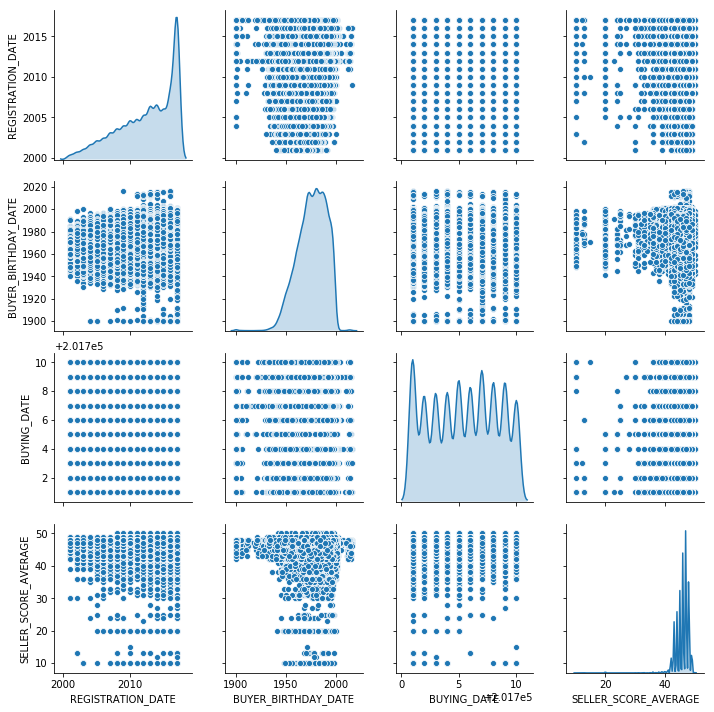

In [44]:
sns.pairplot(numerical_features, diag_kind="kde");

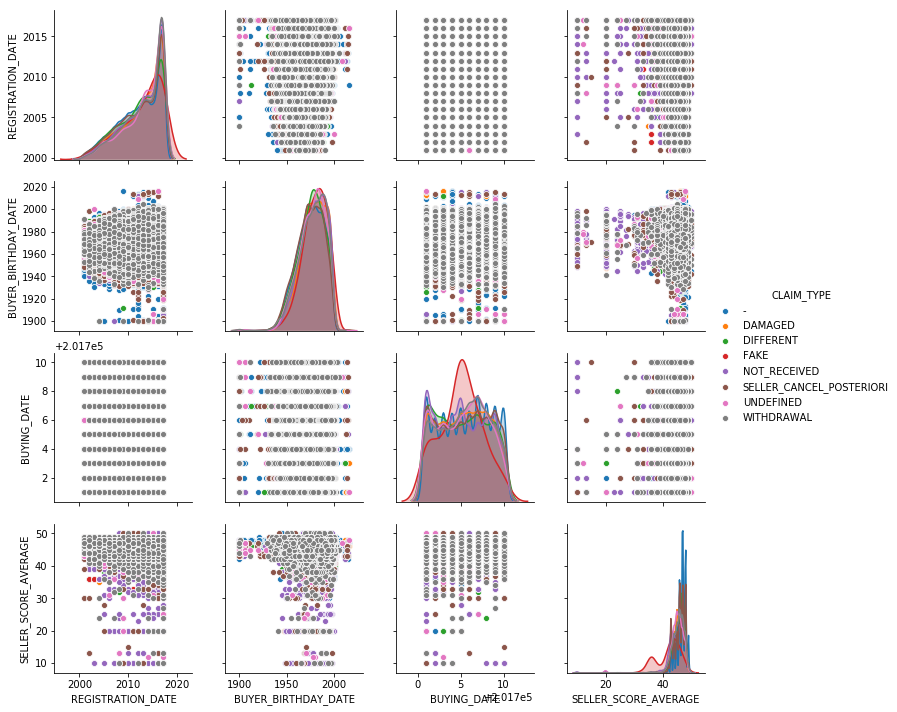

In [45]:
sns.pairplot(numerical_features, hue="CLAIM_TYPE", hue_order=claim_order);

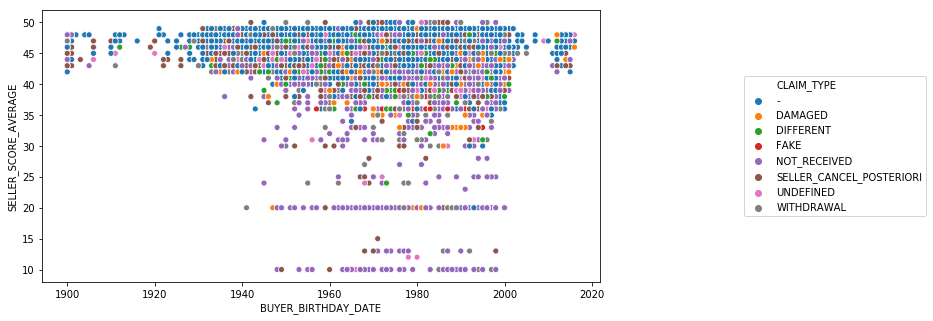

In [46]:
plt.figure(figsize=(10,5))
g = sns.scatterplot(x="BUYER_BIRTHDAY_DATE", y="SELLER_SCORE_AVERAGE", data = numerical_features, hue="CLAIM_TYPE", hue_order=claim_order);
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1);

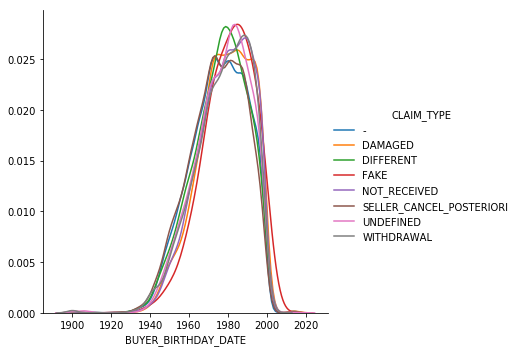

In [47]:
g = sns.FacetGrid(numerical_features, hue="CLAIM_TYPE", hue_order=claim_order, height=5);
g.map(sns.distplot, "BUYER_BIRTHDAY_DATE", hist=False).add_legend();

# CATEGORICAL FEATURES

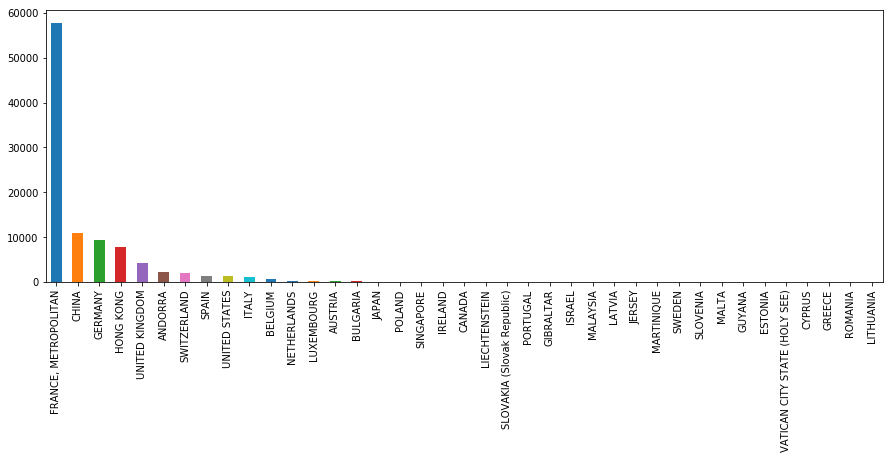

In [48]:
all_data['SELLER_COUNTRY'].value_counts().plot(kind='bar', figsize=(15,5));

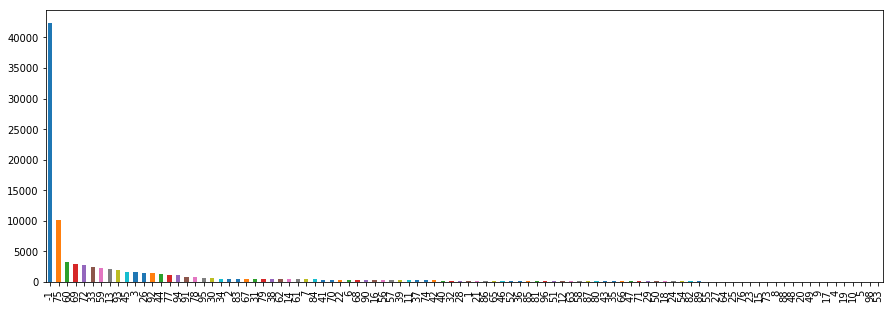

In [49]:
all_data['SELLER_DEPARTMENT'].value_counts().plot(kind='bar', figsize=(15,5));

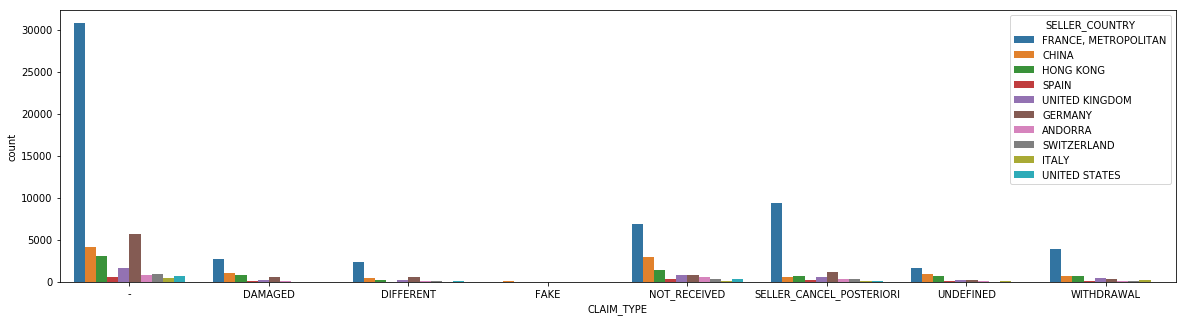

In [50]:
# TOP 10 SELLER_COUNTRY
plt.figure(figsize=(20,5))
categorical_data = all_data[all_data['SELLER_COUNTRY'].isin(all_data['SELLER_COUNTRY'].value_counts().head(10).index)]
sns.countplot(x='CLAIM_TYPE', hue='SELLER_COUNTRY',data=categorical_data, order=claim_order);